<a href="https://colab.research.google.com/github/DonFrancis1/Indian-Start-Up-EDA/blob/main/Start_Up_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Growth of Indian Startups
  

## This EDA will answer the following questions
    1. How Does the Funding Ecosystem changes with respect to Time?
    2. What is the General Amount that Startups get in India?
    3. Which Kind of Industries are more preferred for Startups?
    4. Does Location also play a role, In determining the Growth of a Startup?
    5. Who plays the main role in Indian Startups Ecosystem?
    6. What are the different Types of Funding for Startups?

In [1]:
#Importing The required Libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Clean Finance.xlsx')

In [4]:
#checking the number of rows and columns
df.shape

(3041, 8)

In [5]:
#Inspecting the dataset
df.head()

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
0,2020-01-09,BYJU’S,Ed-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
2,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [6]:
#inspecting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3040 non-null   datetime64[ns]
 1   Startup Name       3041 non-null   object        
 2   Industry Vertical  2871 non-null   object        
 3   SubVertical        2107 non-null   object        
 4   City  Location     2862 non-null   object        
 5   Investors Name     3020 non-null   object        
 6   Investment Type    3038 non-null   object        
 7   Amount in USD      3041 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 190.2+ KB


# How Does the Funding Ecosystem changes with respect to Time?

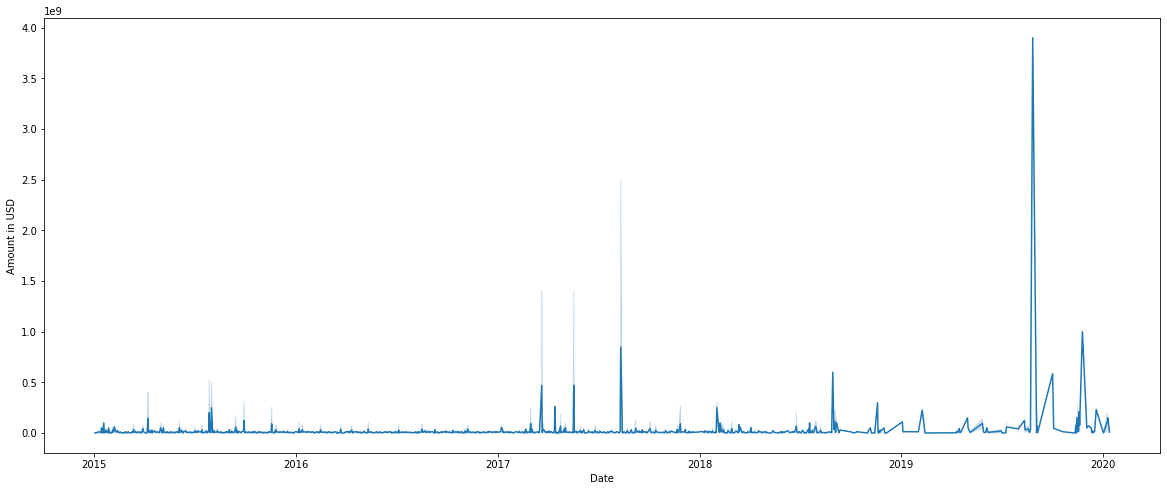

In [7]:
plt.figure(figsize=(20,8))
sns.lineplot(df['Date'], df['Amount in USD']);

In [8]:
#Using Plotly express to display the data labels on hovering
px.line(df, x= 'Date',y = 'Amount in USD')

# What is the General Amount that Startups get in India?

In [9]:
print("The average startup funding is:", df['Amount in USD'].mean())

The average startup funding is: 16539032.894442618


# Which Kind of Industries are more preferred for Startups?

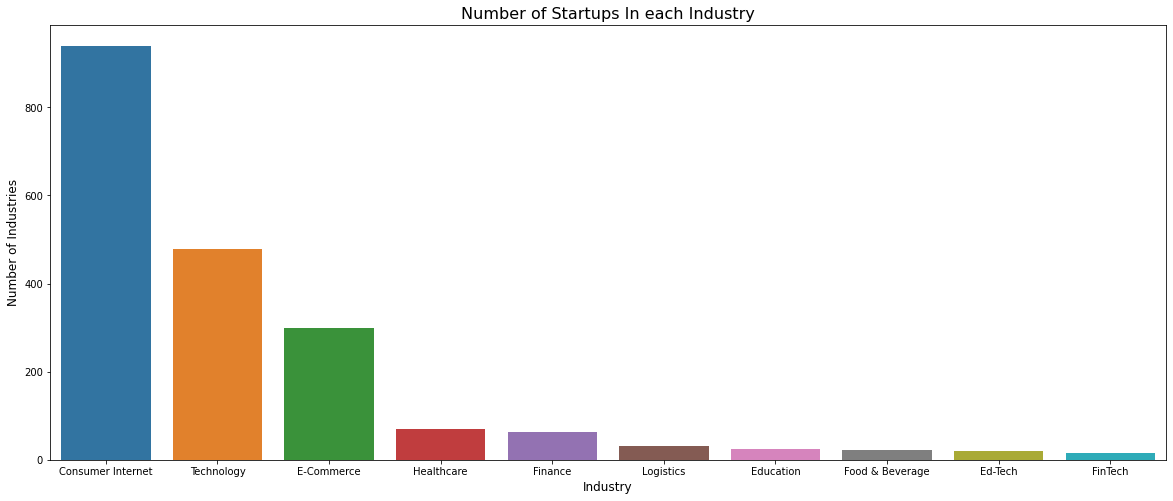

In [10]:
industrycount = df['Industry Vertical'].value_counts().head(10)
plt.figure(figsize=(20,8))
sns.barplot(industrycount.index, industrycount.values)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Industries', fontsize=12)
plt.title("Number of Startups In each Industry", fontsize=16);

In [11]:
industrycount = df['Industry Vertical'].value_counts().head(10)
plt.figure(figsize=(20,8))
px.bar(data_frame= df,x =industrycount.index,y = industrycount.values,color = industrycount.index);

<Figure size 1440x576 with 0 Axes>

# Does Location also play a role, In determining the Growth of a Startup?

In [12]:
city = df['City  Location'].value_counts().head(10)
print(city)

Bangalore    700
Mumbai       566
New Delhi    421
Gurgaon      287
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Gurugram      50
Name: City  Location, dtype: int64


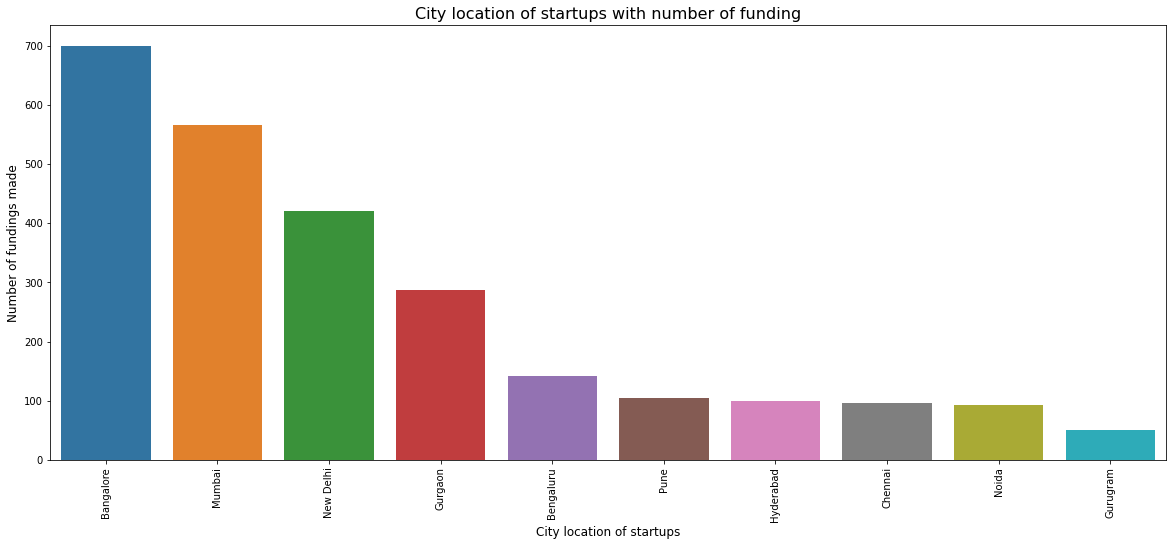

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(city.index, city.values)
plt.xticks(rotation='vertical')
plt.xlabel('City location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("City location of startups with number of funding", fontsize=16);

In [14]:
plt.figure(figsize=(20,8))
px.bar(data_frame=df, x= city.index, y=city.values)

<Figure size 1440x576 with 0 Axes>

# Who plays the main role in Indian Startups Ecosystem?

In [15]:
investors = df['Investors Name'].value_counts().head(10)
print(investors)

Undisclosed Investors       118
Ratan Tata                   25
Indian Angel Network         24
Group Of Angel Investors     19
Kalaari Capital              16
Sequoia Capital              15
Saif Partners                12
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
Name: Investors Name, dtype: int64


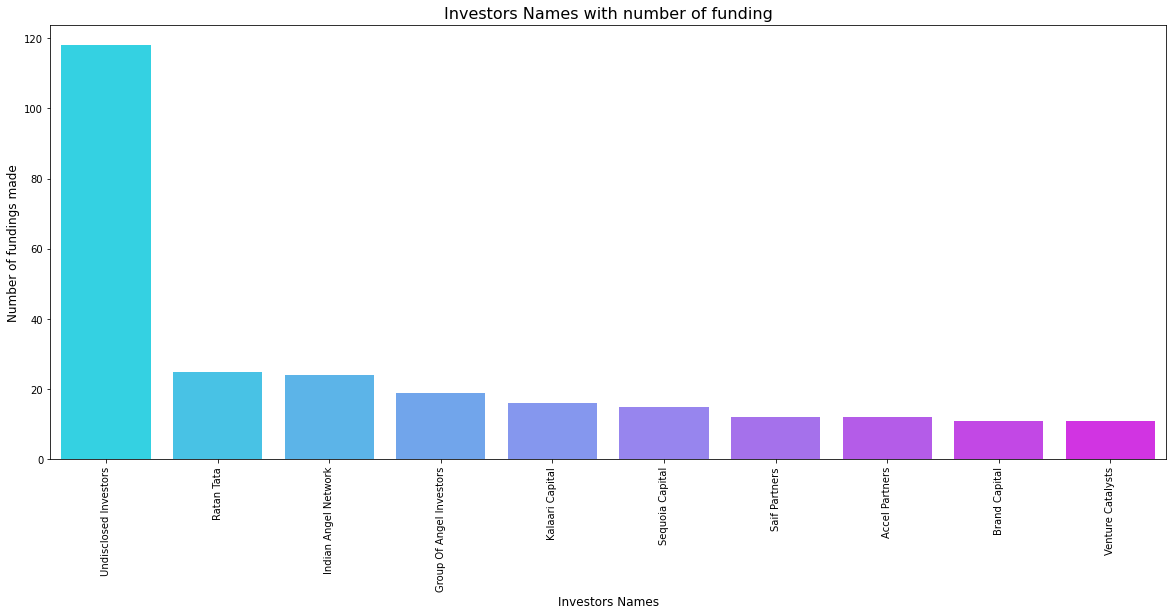

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16);

# What are the different Types of Funding for Startups?

In [17]:
investment = df['Investment Type'].value_counts().head(10)
print(investment)

Private Equity          1355
Seed Funding            1354
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed/ funding             30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: Investment Type, dtype: int64


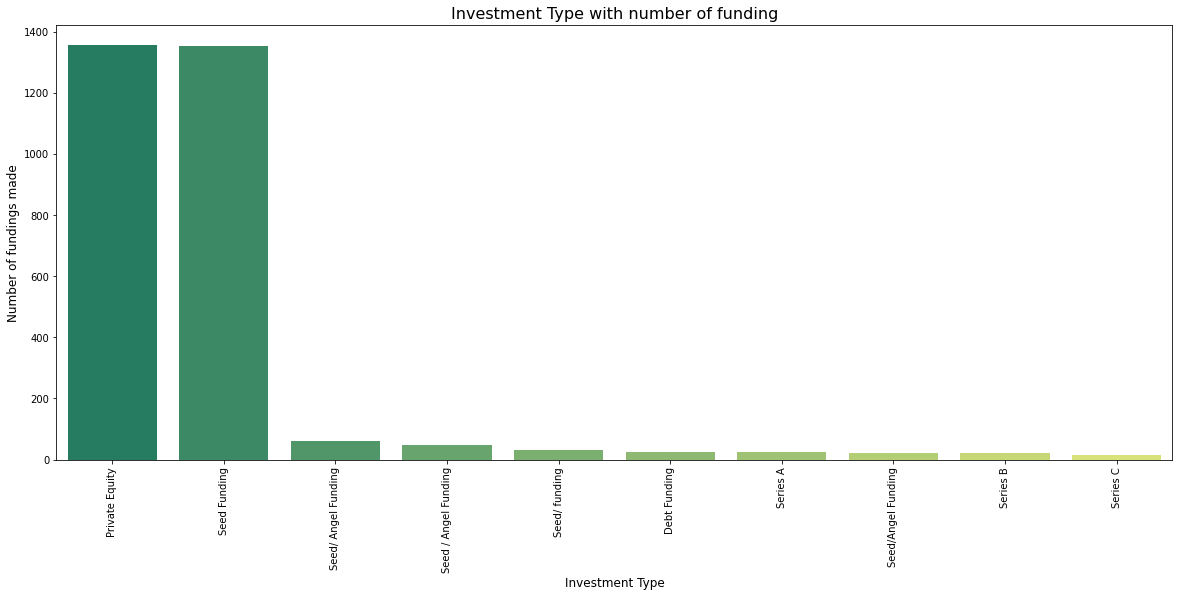

In [18]:
plt.figure(figsize=(20,8))
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16);
